In this Practical you will implement different architectures of neural networks for solving the sentiment analysis task. Last week you applied Multilayer Perceptron with average embedding vectors passed as input to perform the same task. This time you will used the Embedding layer available in Keras. Instead of a single (averaged) embedding vector, the model will take a sequence of embeddings as input. You will explore the following network architectures:
1. Multilayer Perceptron with the Embedding layer, which allows to learn an embedding for each word in the training set along with the neural network learning process.
2. Multilayer Perceptron with the Embedding layer and custom pre-trained word embeddings.
3. Convolutional Neural Network with the pre-trained word embeddings.

# Task 1: MLP with Embedding Layer

**T.1** Load the yelp reviews dataset. Split it into input/output and train/test sets.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('yelp_reviews.csv',encoding = "ISO-8859-1")

#select input and output variables
data = df.values[:,0]
labels = df.values[:,1]

x_train, x_test, y_train, y_test = train_test_split(data, labels,test_size=0.3, random_state=0)


***
**T1.2** Data pre-processing.

The Embedding layer offered by Keras can be used for neural networks on text data. Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset. It requires the input data to be integer encoded, so that each word is represented by a unique integer. This data preparation step can be performed using the [Tokenizer API](http://faroit.com/keras-docs/1.2.2/preprocessing/text/) also provided with Keras. You can specify the vocabulary size via the $num\_words$ parameter. The tokenizer will pick the $num\_words$ of the most common words from your train dataset.

Convert each instance from the train set into sequence of integers using the Tokanizer.

In [3]:
from keras.preprocessing.text import Tokenizer

Encoding each word into unique integer and converting each document into a sequence of integers.

In [4]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
num_words = len(tokenizer.word_index)+1

You can test it by printing the first few elements from your train set and from the list storing the sequences of integer values. The number of words from the train set for each entry should be the same a the number of integers in the corresponding sequence.

In [5]:
for x in x_train[:5]:
    print(x)

I love this place.
The restaurant atmosphere was exquisite.
Google mediocre and I imagine Smashburger will pop up.
I seriously cannot believe that the owner has so many unexperienced employees that all are running around like chickens with their heads cut off.
This place is overpriced, not consistent with their boba, and it really is OVERPRICED!


In [6]:
sequences[:5]

[[3, 93, 8, 14],
 [1, 50, 145, 4, 696],
 [697, 229, 2, 3, 698, 699, 42, 700, 60],
 [3,
  230,
  440,
  336,
  28,
  1,
  441,
  82,
  21,
  168,
  701,
  702,
  28,
  43,
  32,
  337,
  197,
  37,
  703,
  18,
  44,
  704,
  442,
  231],
 [8, 14, 7, 169, 15, 705, 18, 44, 706, 2, 10, 46, 7, 169]]

The sequences have different lengths and Keras needs inputs to be vectorized and all inputs to have the same length. We have to pad all input sequences to have the same length. We can do this with a built in Keras function, in this case the $pad\_sequences()$ function.
Find the max length of a review and use the [pad_sequences function](https://keras.io/preprocessing/sequence/) to convert all sequences from the encoddings list into the same length.

In [7]:
length = []
for x in x_train:
    length.append(len(x.split()))
max_length = max(length) + 10 #You can increasing the max lenght slightly in case there are some longer sentences in the test dataset

Converting the sequences into padded sequences so they are all of the same length.  Keras zero-pads at the beginning, if a sentence length is shorter than the maximum length

In [8]:
from keras.preprocessing.sequence import pad_sequences
x_train_seq = pad_sequences(sequences, maxlen=max_length)
x_train_seq.shape

(697, 42)

***
**T1.3** Converting the test data into sequences of the same lenght.

Now we need to perform the same data pre-processing on the test dataset. 

Convert the test dataset into sequences of the same format as it was done for the train dataset. Note: You should use the Tokenizer and the maximum review length as specified earlier (do not fit the Tokenizer into the test dataset).

In [9]:
sequences_val = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_val, maxlen=max_length)

In [10]:
x_test_seq.shape
x_test_seq=np.asarray(x_test_seq).astype(np.float32)
x_train_seq=np.asarray(x_train_seq).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)

***
**T1.4 Train and evaluate MLP with Embedding layer**

Now you can train the MLP with the [Embedding layer](https://keras.io/layers/embeddings/) and evaluate it with the test data. The Embedding layer should be added as the fist layer in a Sequential model followed by the Flatten layer. After this you can include some Dense layers suitable for your classification problem.

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras import initializers
from keras.regularizers import l1
import matplotlib.pyplot as plt

Epoch 1/30
22/22 - 1s - loss: 1.2792 - acc: 0.5352 - val_loss: 0.8541 - val_acc: 0.4783 - 846ms/epoch - 38ms/step
Epoch 2/30
22/22 - 0s - loss: 0.7926 - acc: 0.5466 - val_loss: 0.7564 - val_acc: 0.4783 - 203ms/epoch - 9ms/step
Epoch 3/30
22/22 - 0s - loss: 0.7374 - acc: 0.5495 - val_loss: 0.7390 - val_acc: 0.6388 - 237ms/epoch - 11ms/step
Epoch 4/30
22/22 - 0s - loss: 0.7042 - acc: 0.7231 - val_loss: 0.7385 - val_acc: 0.5151 - 243ms/epoch - 11ms/step
Epoch 5/30
22/22 - 0s - loss: 0.6406 - acc: 0.8565 - val_loss: 0.7222 - val_acc: 0.7258 - 227ms/epoch - 10ms/step
Epoch 6/30
22/22 - 0s - loss: 0.5352 - acc: 0.9326 - val_loss: 0.7306 - val_acc: 0.7124 - 214ms/epoch - 10ms/step
Epoch 7/30
22/22 - 0s - loss: 0.4171 - acc: 0.9699 - val_loss: 0.7580 - val_acc: 0.6789 - 225ms/epoch - 10ms/step
Epoch 8/30
22/22 - 0s - loss: 0.3499 - acc: 0.9799 - val_loss: 0.7305 - val_acc: 0.7157 - 207ms/epoch - 9ms/step
Epoch 9/30
22/22 - 0s - loss: 0.3048 - acc: 0.9943 - val_loss: 0.7239 - val_acc: 0.7258 - 

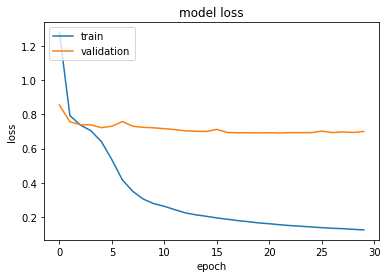

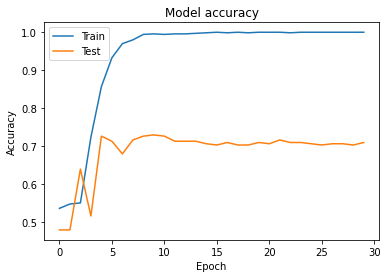

In [12]:
model_1 = Sequential()
model_1.add(Embedding(num_words, 300, input_length=max_length, trainable=True))
model_1.add(Flatten())
init_he_u = initializers.he_uniform(seed=None)
model_1.add(Dense(10, activation='relu',kernel_initializer=init_he_u, kernel_regularizer=l1(0.001)))
model_1.add(Dense(1, activation='sigmoid', kernel_regularizer=l1(0.001)))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model_1.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=30, batch_size=32, verbose=2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Task 2: Embedding Layer with pre-trained embeddings

The Keras embedding layer can also use a word embedding learned elsewhere such as word2vec or GloVe. The key difference is that the embedding layer can be seeded with the pre-trained word embedding weights. For this purpose you need to build a matrix of words using the word2vec/GloVe vectors. You can set number of words that we want to use. The words will be selected as the most frequent words in the training set.

The matrix should have the number of row equals to the number of words, and number of column equals to the dimension of the embedding vectors. In each row $i$ the matrix should contain the embedding for a word which is encoded with the $i$ number.

**T2.1** Load the word2vec and the GloVe models.

In [13]:
from gensim.models import KeyedVectors
import re 
from gensim.scripts.glove2word2vec import glove2word2vec

In [14]:
file = 'GoogleNews-vectors-negative300.bin'
word2vec = KeyedVectors.load_word2vec_format(file, binary=True, limit=50000)
word2vec_vectors = word2vec

In [15]:
filename = 'glove.6B.300d.txt.word2vec'
glove = KeyedVectors.load_word2vec_format(filename, binary=False)
glove_vectors = glove

***
**T2.2** Constructing the weight matrix for the embedding layer

The matrix should have the number of row equals to the number of words, and number of column equals to the dimension of the embedding vectors. In each row $i$ the matrix should contain the embedding for a word which is encoded with the $i$ number (as assigned earlier by the Tokenizer). 

The matrix can be constructed as follow:

- Create a matrix of zeros of appropriate shape (number of words x dimension of the embeddings)
- For each word in the vocabulary obtain (if exist) its embedding from a language model (word2vec or GloVe)
- Place the obtained embedding vector to the corresponding position (row) in the matrix

In [16]:
import numpy as np

embedding_matrix = np.zeros((num_words, 300))
for word, i in tokenizer.word_index.items():
    if word in word2vec_vectors:
        embedding_vector = word2vec[word]
        embedding_matrix[i] = embedding_vector

In [17]:
embedding_matrix.shape

(1689, 300)

You can test whether the matrix has been constructed correctly via comparing its rows with the actual embeddings.

In [18]:
tokenizer.word_index.items()

dict_items([('the', 1), ('and', 2), ('i', 3), ('was', 4), ('a', 5), ('to', 6), ('is', 7), ('this', 8), ('of', 9), ('it', 10), ('in', 11), ('food', 12), ('for', 13), ('place', 14), ('not', 15), ('service', 16), ('good', 17), ('with', 18), ('very', 19), ('we', 20), ('so', 21), ('my', 22), ('be', 23), ('were', 24), ('have', 25), ('had', 26), ('great', 27), ('that', 28), ('but', 29), ('you', 30), ('they', 31), ('are', 32), ('here', 33), ('back', 34), ('on', 35), ('at', 36), ('like', 37), ('our', 38), ('go', 39), ('there', 40), ('as', 41), ('will', 42), ('all', 43), ('their', 44), ('time', 45), ('really', 46), ('best', 47), ('just', 48), ('never', 49), ('restaurant', 50), ('nice', 51), ('one', 52), ('also', 53), ('been', 54), ('an', 55), ('ever', 56), ('your', 57), ('if', 58), ('friendly', 59), ('up', 60), ("don't", 61), ('would', 62), ('only', 63), ('no', 64), ('disappointed', 65), ('delicious', 66), ('from', 67), ('bad', 68), ('amazing', 69), ('get', 70), ('again', 71), ('out', 72), ('som

In [19]:
print(np.array_equal(embedding_matrix[1] ,word2vec['the']))

True


***
**T2.3** Implementing MLP

Now you can implement the MLP. You will have to pass the embedding_matrix as the $weights$ attribute. Finally, we do not want to update the learned word weights in this model, therefore we will set the $trainable$ attribute for the model to be False.

In [20]:
Embedding(num_words, 300, weights=[embedding_matrix], input_length=max_length, trainable=False)

Update the model and evaluate it with the test data for comparison.

Epoch 1/30
22/22 - 1s - loss: 1.3592 - acc: 0.6083 - val_loss: 0.9488 - val_acc: 0.6689 - 598ms/epoch - 27ms/step
Epoch 2/30
22/22 - 0s - loss: 0.8046 - acc: 0.8207 - val_loss: 0.8150 - val_acc: 0.6990 - 89ms/epoch - 4ms/step
Epoch 3/30
22/22 - 0s - loss: 0.6839 - acc: 0.8852 - val_loss: 0.7697 - val_acc: 0.6990 - 86ms/epoch - 4ms/step
Epoch 4/30
22/22 - 0s - loss: 0.6379 - acc: 0.8924 - val_loss: 0.7568 - val_acc: 0.7157 - 108ms/epoch - 5ms/step
Epoch 5/30
22/22 - 0s - loss: 0.6118 - acc: 0.9096 - val_loss: 0.7527 - val_acc: 0.7124 - 105ms/epoch - 5ms/step
Epoch 6/30
22/22 - 0s - loss: 0.5893 - acc: 0.9197 - val_loss: 0.7487 - val_acc: 0.7191 - 102ms/epoch - 5ms/step
Epoch 7/30
22/22 - 0s - loss: 0.5718 - acc: 0.9268 - val_loss: 0.7497 - val_acc: 0.7291 - 102ms/epoch - 5ms/step
Epoch 8/30
22/22 - 0s - loss: 0.5596 - acc: 0.9225 - val_loss: 0.7529 - val_acc: 0.7224 - 98ms/epoch - 4ms/step
Epoch 9/30
22/22 - 0s - loss: 0.5429 - acc: 0.9412 - val_loss: 0.7466 - val_acc: 0.7358 - 117ms/ep

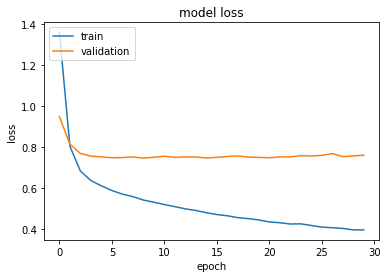

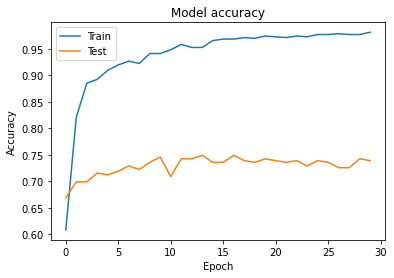

In [21]:
model_2 = Sequential()
model_2.add(Embedding(num_words, 300, weights=[embedding_matrix], input_length=max_length, trainable=False))
model_2.add(Flatten())
init_he_u = initializers.he_uniform(seed=None)
model_2.add(Dense(10, activation='relu',kernel_initializer=init_he_u, kernel_regularizer=l1(0.001)))
model_2.add(Dense(1, activation='sigmoid', kernel_regularizer=l1(0.001)))
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model_2.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=30, batch_size=32, verbose=2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 42, 300)           506700    
                                                                 
 flatten (Flatten)           (None, 12600)             0         
                                                                 
 dense (Dense)               (None, 10)                126010    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 632,721
Trainable params: 632,721
Non-trainable params: 0
_________________________________________________________________


***
**T2.4** Change the $trainable$ attribute to True and see if there is any difference in the performance.

Epoch 1/30
22/22 - 1s - loss: 1.3776 - acc: 0.6356 - val_loss: 0.9773 - val_acc: 0.6087 - 704ms/epoch - 32ms/step
Epoch 2/30
22/22 - 0s - loss: 0.7788 - acc: 0.8594 - val_loss: 0.8109 - val_acc: 0.6990 - 198ms/epoch - 9ms/step
Epoch 3/30
22/22 - 0s - loss: 0.6065 - acc: 0.9340 - val_loss: 0.7526 - val_acc: 0.7258 - 202ms/epoch - 9ms/step
Epoch 4/30
22/22 - 0s - loss: 0.5014 - acc: 0.9570 - val_loss: 0.7257 - val_acc: 0.7492 - 177ms/epoch - 8ms/step
Epoch 5/30
22/22 - 0s - loss: 0.4258 - acc: 0.9799 - val_loss: 0.7156 - val_acc: 0.7592 - 195ms/epoch - 9ms/step
Epoch 6/30
22/22 - 0s - loss: 0.3723 - acc: 0.9900 - val_loss: 0.7044 - val_acc: 0.7458 - 202ms/epoch - 9ms/step
Epoch 7/30
22/22 - 0s - loss: 0.3337 - acc: 0.9957 - val_loss: 0.6887 - val_acc: 0.7659 - 180ms/epoch - 8ms/step
Epoch 8/30
22/22 - 0s - loss: 0.3019 - acc: 0.9957 - val_loss: 0.6837 - val_acc: 0.7759 - 195ms/epoch - 9ms/step
Epoch 9/30
22/22 - 0s - loss: 0.2771 - acc: 0.9971 - val_loss: 0.6798 - val_acc: 0.7659 - 178ms

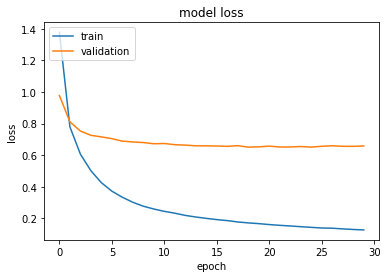

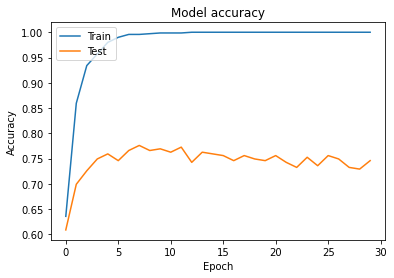

In [23]:
model_3 = Sequential()
model_3.add(Embedding(num_words, 300, weights=[embedding_matrix], input_length=max_length, trainable=True))
model_3.add(Flatten())
init_he_u = initializers.he_uniform(seed=None)
model_3.add(Dense(10, activation='relu',kernel_initializer=init_he_u, kernel_regularizer=l1(0.001)))
model_3.add(Dense(1, activation='sigmoid', kernel_regularizer=l1(0.001)))
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model_3.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=30, batch_size=32, verbose=2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Task 3: Convolutional  Neural Network

**T3.1** Build a CNN using the embeding layer as previously. You can add filters using [Conv1D](https://keras.io/layers/convolutional/) layers and perform pooling via [max-pooling layer](https://keras.io/layers/pooling/). At the end you should add some Dense layers suitable for the classification task. Try using fixed pre-trained weights and trainable embeddings for comparison.

In [24]:
from keras.layers import Conv1D, GlobalMaxPooling1D

Using static word vectors extracted from Word2Vec

Epoch 1/30
22/22 - 1s - loss: 5.3813 - acc: 0.5911 - val_loss: 4.0210 - val_acc: 0.6254 - 861ms/epoch - 39ms/step
Epoch 2/30
22/22 - 0s - loss: 3.0308 - acc: 0.7547 - val_loss: 2.1728 - val_acc: 0.7592 - 266ms/epoch - 12ms/step
Epoch 3/30
22/22 - 0s - loss: 1.5593 - acc: 0.8451 - val_loss: 1.1839 - val_acc: 0.7726 - 283ms/epoch - 13ms/step
Epoch 4/30
22/22 - 0s - loss: 0.9277 - acc: 0.8723 - val_loss: 0.8580 - val_acc: 0.7860 - 266ms/epoch - 12ms/step
Epoch 5/30
22/22 - 0s - loss: 0.7072 - acc: 0.8694 - val_loss: 0.7363 - val_acc: 0.8127 - 283ms/epoch - 13ms/step
Epoch 6/30
22/22 - 0s - loss: 0.6178 - acc: 0.8938 - val_loss: 0.6992 - val_acc: 0.8294 - 295ms/epoch - 13ms/step
Epoch 7/30
22/22 - 0s - loss: 0.5683 - acc: 0.9125 - val_loss: 0.6654 - val_acc: 0.8261 - 344ms/epoch - 16ms/step
Epoch 8/30
22/22 - 0s - loss: 0.5308 - acc: 0.9125 - val_loss: 0.6736 - val_acc: 0.8027 - 405ms/epoch - 18ms/step
Epoch 9/30
22/22 - 0s - loss: 0.5068 - acc: 0.9197 - val_loss: 0.6255 - val_acc: 0.8462 

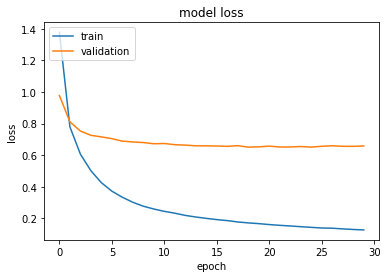

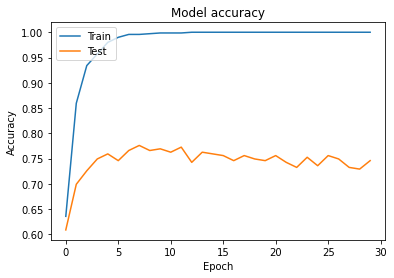

In [25]:
cnn_1 = Sequential()
cnn_1.add(Embedding(num_words, 300, weights=[embedding_matrix], input_length=max_length, trainable=False))
init_he_u = initializers.he_uniform(seed=None)
cnn_1.add(Conv1D(128, 5, activation='relu', kernel_initializer=init_he_u, kernel_regularizer=l1(0.001)))
cnn_1.add(GlobalMaxPooling1D())
cnn_1.add(Dense(10, activation='relu'))
cnn_1.add(Dense(1, activation='sigmoid'))
cnn_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
cnn_1.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=30, batch_size=32, verbose=2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Trainable word2vec ebmeddings.

Epoch 1/10
22/22 - 1s - loss: 5.4825 - acc: 0.6184 - val_loss: 4.1741 - val_acc: 0.5853 - 963ms/epoch - 44ms/step
Epoch 2/10
22/22 - 0s - loss: 3.1295 - acc: 0.8379 - val_loss: 2.2943 - val_acc: 0.7625 - 375ms/epoch - 17ms/step
Epoch 3/10
22/22 - 0s - loss: 1.6174 - acc: 0.9197 - val_loss: 1.2682 - val_acc: 0.8094 - 430ms/epoch - 20ms/step
Epoch 4/10
22/22 - 0s - loss: 0.8983 - acc: 0.9498 - val_loss: 0.8805 - val_acc: 0.7993 - 445ms/epoch - 20ms/step
Epoch 5/10
22/22 - 0s - loss: 0.6272 - acc: 0.9512 - val_loss: 0.7201 - val_acc: 0.8395 - 439ms/epoch - 20ms/step
Epoch 6/10
22/22 - 0s - loss: 0.4980 - acc: 0.9699 - val_loss: 0.6383 - val_acc: 0.8361 - 453ms/epoch - 21ms/step
Epoch 7/10
22/22 - 0s - loss: 0.4018 - acc: 0.9813 - val_loss: 0.5952 - val_acc: 0.8227 - 457ms/epoch - 21ms/step
Epoch 8/10
22/22 - 0s - loss: 0.3439 - acc: 0.9842 - val_loss: 0.5630 - val_acc: 0.8294 - 452ms/epoch - 21ms/step
Epoch 9/10
22/22 - 0s - loss: 0.3025 - acc: 0.9871 - val_loss: 0.5396 - val_acc: 0.8328 

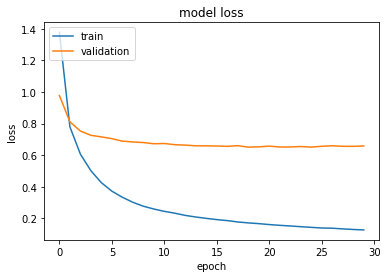

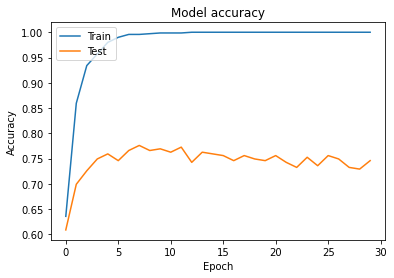

In [26]:
cnn_2 = Sequential()
cnn_2.add(Embedding(num_words, 300, weights=[embedding_matrix], input_length=max_length, trainable=True))
init_he_u = initializers.he_uniform(seed=None)
cnn_2.add(Conv1D(128, 5, activation='relu', kernel_initializer=init_he_u, kernel_regularizer=l1(0.001)))
cnn_2.add(GlobalMaxPooling1D())
cnn_2.add(Dense(10, activation='relu'))
cnn_2.add(Dense(1, activation='sigmoid'))
cnn_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
cnn_2.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=10, batch_size=32, verbose=2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Training custom embeddings with Keras Embedding layer

Epoch 1/10
22/22 - 1s - loss: 0.6855 - acc: 0.5466 - val_loss: 0.6639 - val_acc: 0.6589 - 830ms/epoch - 38ms/step
Epoch 2/10
22/22 - 0s - loss: 0.5510 - acc: 0.8766 - val_loss: 0.5361 - val_acc: 0.7525 - 278ms/epoch - 13ms/step
Epoch 3/10
22/22 - 0s - loss: 0.2443 - acc: 0.9541 - val_loss: 0.4179 - val_acc: 0.7960 - 278ms/epoch - 13ms/step
Epoch 4/10
22/22 - 0s - loss: 0.0512 - acc: 0.9957 - val_loss: 0.4123 - val_acc: 0.8127 - 281ms/epoch - 13ms/step
Epoch 5/10
22/22 - 0s - loss: 0.0106 - acc: 1.0000 - val_loss: 0.4895 - val_acc: 0.7826 - 275ms/epoch - 12ms/step
Epoch 6/10
22/22 - 0s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.4663 - val_acc: 0.8161 - 280ms/epoch - 13ms/step
Epoch 7/10
22/22 - 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.4908 - val_acc: 0.8060 - 273ms/epoch - 12ms/step
Epoch 8/10
22/22 - 0s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4998 - val_acc: 0.8060 - 274ms/epoch - 12ms/step
Epoch 9/10
22/22 - 0s - loss: 8.4131e-04 - acc: 1.0000 - val_loss: 0.5040 - val_acc: 0.8

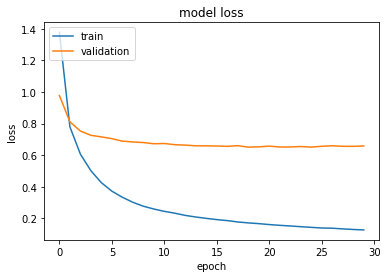

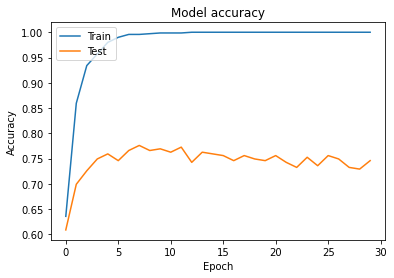

In [27]:
cnn_3 = Sequential()
cnn_3.add(Embedding(num_words, 300, input_length=max_length, trainable=True))
cnn_3.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
cnn_3.add(GlobalMaxPooling1D())
cnn_3.add(Dense(256, activation='relu'))
cnn_3.add(Dense(1, activation='sigmoid'))
cnn_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
cnn_3.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=10, batch_size=32, verbose=2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()